In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append("..")

from models.data_processor import DataProcessor
from models.linear_reg.simple_linear_regressor import SimpleLinearRegressor
from models.linear_reg.linear_regressor import LinearRegressor
from models.grad_boost.grad_booster import GradBooster
from models.exp_smoothing.smoothing import SmoothingPredictor
from models.baseline_regressor import BaselineRegressor
from time import time 

### Preprocess data

In [3]:
processor = DataProcessor(path='../data/input/data2019-2021-small.grib')
data, feature_list = processor.data, processor.feature_list
s = 5
fh = 1

X, y = processor.preprocess(s, fh, use_neighbours=False)
X_train, X_test, y_train, y_test = processor.train_val_test_split(X, y, split_type=2) # train 2019; test 2021

In [3]:
# # because smoothing is slow
# X_train, y_train = X_train[-100:], y_train[-100:]
# X_test, y_test = X_test[:5], y_test[:5]

### Fit and evaluate models

In [4]:
reg_classes = [
    # SmoothingPredictor,
    BaselineRegressor,
    SimpleLinearRegressor,
    LinearRegressor,
    GradBooster
]

default_types = [
    # "simple",
    "standard",
    "ridge",
    "ridge",
    "lgb"
]

for reg_class, default_type in zip(reg_classes, default_types):
    print(reg_class.__name__, default_type)
    start = time()
    regressor = reg_class(X.shape, fh, feature_list, default_type)
    regressor.train(X_train, y_train)
    y_hat = regressor.predict_and_evaluate(X_test, y_test, plot=False)
    regressor.save_prediction_tensor(y_hat)
    end = time()
    print(f'\n{reg_class.__name__} {end-start} [s]')
    print("\n======================================\n")

BaselineRegressor standard
Evaluation metrics for entire test set:
t2m => RMSE: 9.12573545539063;  MAE: 7.609569590636848; SE: 0.007036642941927937
sp => RMSE: 8.284739406510885;  MAE: 6.5173220695874345; SE: 0.01623546992051714
tcc => RMSE: 0.3604296477344859;  MAE: 0.323887774887461; SE: 0.00028020813242258326
u10 => RMSE: 2.9085824116652805;  MAE: 2.26632253820643; SE: 0.002280315936773002
v10 => RMSE: 2.671482457883997;  MAE: 2.131336113645767; SE: 0.002085767001179107
tp => RMSE: 0.311762192857256;  MAE: 0.12257721447873195; SE: 0.00024301953731840448

BaselineRegressor 2.474334955215454 [s]


SimpleLinearRegressor ridge
Evaluation metrics for entire test set:
t2m => RMSE: 2.1227015952352475;  MAE: 1.583813584526771; SE: 0.007036642941927937
sp => RMSE: 1.426594759467368;  MAE: 1.04074274051827; SE: 0.01623546992051714
tcc => RMSE: 0.29537001456373574;  MAE: 0.24220492366961963; SE: 0.00028020813242258326
u10 => RMSE: 1.5611287130016671;  MAE: 1.1472146229797318; SE: 0.00228031593

t2m => RMSE:  1.865789245627164; MAE: 1.4128472541208872; SE: 0.0475004643909258
sp => RMSE:  0.7031862638234274; MAE: 0.5325716635524292; SE: 0.5562967580882753
tcc => RMSE:  0.2508831407664795; MAE: 0.2138095042192346; SE: 0.006926918043655764
u10 => RMSE:  1.1265020019544865; MAE: 0.8788621315887699; SE: 0.047103162982545924
v10 => RMSE:  0.7551012187041004; MAE: 0.5870519442812998; SE: 0.018376405681173522
tp => RMSE:  0.10733869626158946; MAE: 0.08688603746323699; SE: 0.0006685526688984503


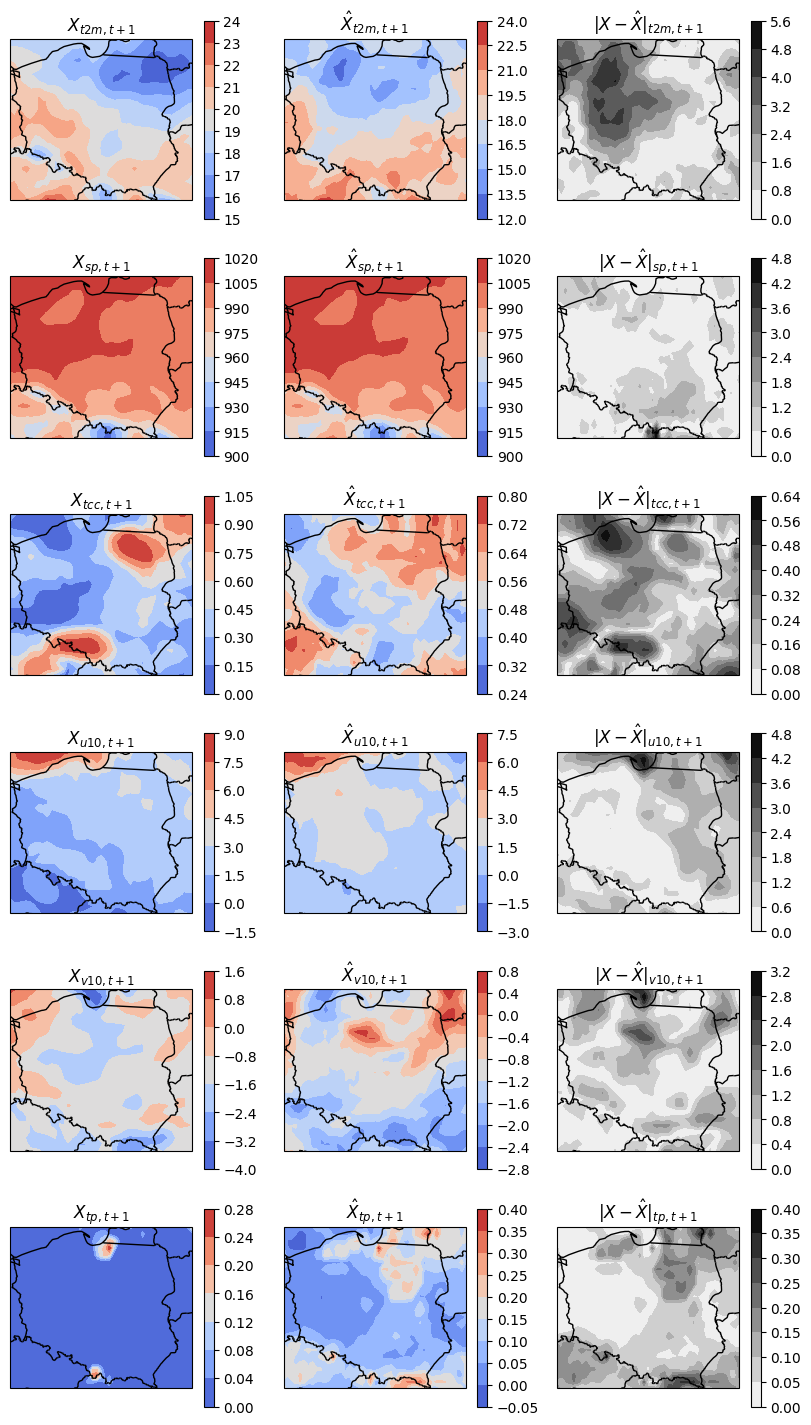

In [5]:
regressor.plot_predictions(y_hat, y_test, 1, pretty=True)